<a href="https://colab.research.google.com/github/JakeOh/202110_itw_lab_python/blob/main/py25_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# 파일이 저장된 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* movies.dat 파일을 읽고 DataFrame 생성.
* DataFrame 탐색.
* 장르가 'Animation'인 영화는 몇 개?
* 장르가 로맨틱 코미디인 영화는 몇 개?
* 어떤 장르의 영화가 가장 많은가?

In [122]:
movies_colnames = ['movie_id', 'title', 'genres']

In [123]:
movies = pd.read_csv(movies_file, sep='::', engine='python', names=movies_colnames)

In [124]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [125]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [126]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [127]:
# Animation 장르의 영화
animations = movies[movies['genres'].str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [128]:
len(animations)

105

In [129]:
# 로맨틱 코미디 장르 - 장르 컬럼에 'Romance'와 'Comedy'가 포함되어 있는 영화들.
romantic_comedies = movies[(movies['genres'].str.contains('Romance')) &
                          (movies['genres'].str.contains('Comedy'))]
romantic_comedies

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [130]:
len(romantic_comedies)

204

In [131]:
# 가장 많이 나오는 장르
movies['genres'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genres, Length: 301, dtype: int64

In [132]:
genres = []  # 개별 영화 장르를 저장할 빈 리스트
for s in movies['genres']:
    genres.extend(s.split(sep='|'))

len(genres)

6408

In [133]:
genre_counts = pd.value_counts(genres)
genre_counts  #> Series

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [134]:
# 장르 상위 7개 시각화
top7 = genre_counts.head(n=7)
top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

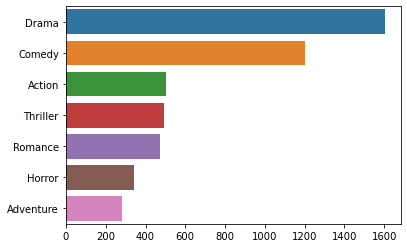

In [135]:
sns.barplot(x= top7.values, y=top7.index)
plt.show()

In [136]:
bottom7 = genre_counts.tail(n=7)
bottom7

Documentary    127
Musical        114
Mystery        106
Animation      105
Fantasy         68
Western         68
Film-Noir       44
dtype: int64

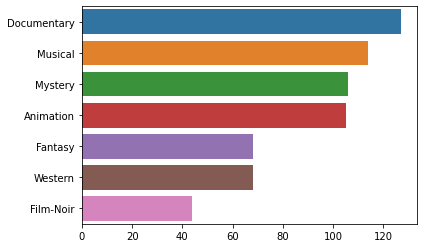

In [137]:
sns.barplot(x=bottom7.values, y=bottom7.index)
plt.show()

In [138]:
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'counts']
genre_counts_df

,genre,counts
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


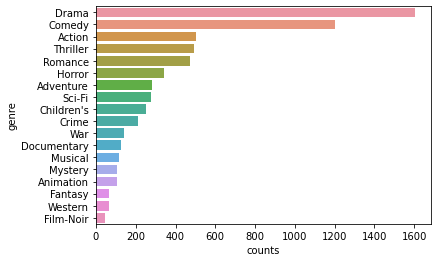

In [139]:
sns.barplot(x='counts', y='genre', data=genre_counts_df)
plt.show()

In [140]:
# 연도별 영화 개봉 숫자 시각화
# 영화 제목 컬럼(title)에서 연도에 해당하는 4자리 문자열을 잘라내고 정수타입으로 변환해서 새로운 컬럼 만듦.
movies['year'] = movies['title'].str[-5:-1].astype('int')
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [141]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


In [142]:
year_counts = movies['year'].value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

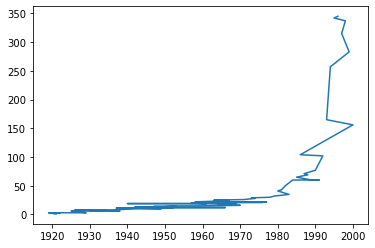

In [143]:
plt.plot(year_counts.index, year_counts.values)
plt.show()

In [144]:
year_counts = year_counts.sort_index()  # Series를 인덱스의 오름차순 정렬을 하고 저장.
year_counts

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

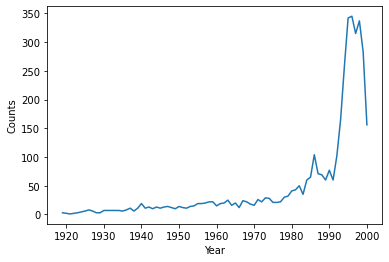

In [145]:
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

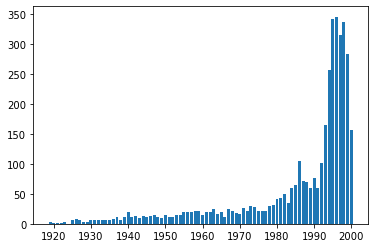

In [146]:
plt.bar(x=year_counts.index, height=year_counts.values)
plt.show()

# DataFrame 합치기(merge)

In [147]:
# 데이터 파일의 GitHub 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
ratings_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'

In [148]:
# 데이터 파일의 컬럼 이름들
movies_colnames = ['movie_id', 'title', 'genres']
ratings_colnames = ['user_id', 'movie_id', 'rating', 'timestamp']
users_colnames = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

In [149]:
# 데이터 프레임 생성
movies = pd.read_csv(movies_file, sep='::', engine='python', names=movies_colnames)

In [150]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [151]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [152]:
ratings = pd.read_csv(ratings_file, sep='::', engine='python', names=ratings_colnames)

In [153]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [154]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [155]:
movies[movies['movie_id'] == 1193]

,movie_id,title,genres
1176,1193,One Flew Over the Cuckoo's Nest (1975),Drama


In [156]:
users = pd.read_csv(users_file, sep='::', engine='python', names=users_colnames)

In [157]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [158]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [159]:
# ratings와 movies를 merge(SQL의 join과 비슷한 기능)
# how 파라미터: join 방식(inner, left, right, outer). 기본값은 'innner'
# on 파라미터: join을 할 때 사용할 컬럼(들)의 이름.
df = pd.merge(left=ratings, right=movies, how='inner', on='movie_id')

In [160]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [162]:
# df와 users 데이터프레임을 merge
df = pd.merge(left=df, right=users, on='user_id')

In [163]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zip_code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [165]:
pd.merge(left=pd.merge(left=ratings, right=movies, on='movie_id'),
         right=users, on='user_id')

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


## 영화 별점 분석

In [166]:
df['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

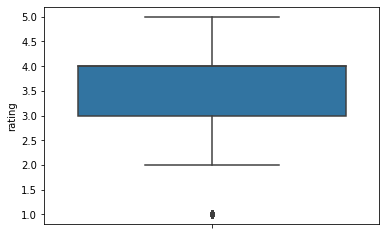

In [167]:
sns.boxplot(y='rating', data=df)
plt.show()

In [168]:
# 영화 별점의 빈도수
rating_counts = df['rating'].value_counts()
rating_counts

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

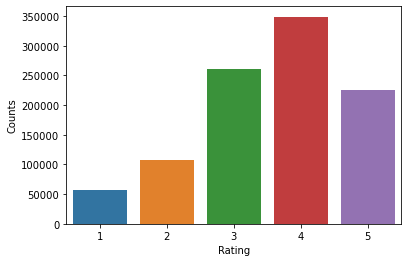

In [169]:
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

## 성별 분석

In [170]:
# 성별 빈도수
gender_counts = df['gender'].value_counts()
gender_counts

M    753769
F    246440
Name: gender, dtype: int64

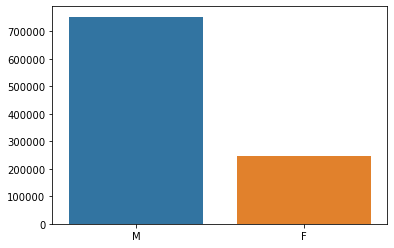

In [171]:
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.show()

## 연령대 분석

In [172]:
age_counts = df['age'].value_counts()
age_counts

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

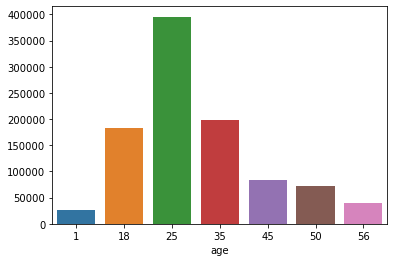

In [173]:
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('age')
plt.show()

## 직업군 분석

In [174]:
occ_counts = df['occupation'].value_counts()
occ_counts

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

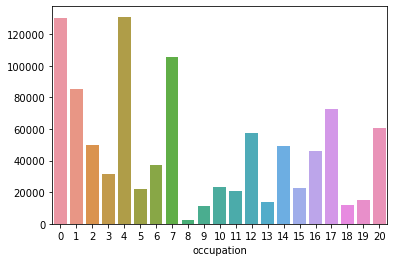

In [175]:
sns.barplot(x=occ_counts.index, y=occ_counts.values)
plt.xlabel('occupation')
plt.show()

# 영화 별점 평균 상위/하위 10개 영화

In [176]:
# 영화 제목별 별점의 평균
by_title = df.groupby(by='title')['rating'].mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [177]:
# by_title을 value의 내림차순 정렬 -> 첫 10개 선택: 별점 평균 상위 10개
by_title.sort_values(ascending=False).head(n=10)

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [178]:
# 별점 평균 하위 10개: by_title을 value의 오름차순 정렬 -> 첫 10개 선택
by_title.sort_values(ascending=True).head(n=10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

별점의 개수가 1~2개 밖에 없는 영화들의 별점 평균을 계산하는 것은 큰 의미가 없을 것 같다. 일정 개수 이상의 별점 건수가 있는 영화들만 선택해서 별점 분석을 하는 것이 더 의미가 있을 것 같다.

영화별 별점 개수를 분석해 보자.

In [179]:
# 영화 제목별 별점 리뷰 개수
title_counts = df['title'].value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [180]:
title_counts.head(20)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [181]:
title_counts.tail(n=20)

Tashunga (1995)                                       1
Wooden Man's Bride, The (Wu Kui) (1994)               1
One Little Indian (1973)                              1
Broken Vessels (1998)                                 1
Smoking/No Smoking (1993)                             1
Nemesis 2: Nebula (1995)                              1
Happy Weekend (1996)                                  1
Song of Freedom (1936)                                1
Silence of the Palace, The (Saimt el Qusur) (1994)    1
Chain of Fools (2000)                                 1
Superweib, Das (1996)                                 1
Outside Ozona (1998)                                  1
Terror in a Texas Town (1958)                         1
Hippie Revolution, The (1996)                         1
McCullochs, The (1975)                                1
Waiting Game, The (2000)                              1
Shadows (Cienie) (1988)                               1
Juno and Paycock (1930)                         

In [182]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

In [183]:
# 150건 이상의 별점 리뷰를 받은 영화 제목들
indexer = title_counts[title_counts >= 150].index

In [184]:
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Alligator (1980)', 'Cowboy Way, The (1994)', 'Twelfth Night (1996)',
       'Program, The (1993)', 'Love and Death on Long Island (1997)',
       'Asphalt Jungle, The (1950)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Golden Voyage of Sinbad, The (1974)', 'In the Army Now (1994)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [185]:
len(indexer)  #> 150건 이상의 별점 리뷰를 받은 영화는 1,683개

1683

In [186]:
by_title_150 = by_title.loc[indexer]
by_title_150

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Asphalt Jungle, The (1950)                                 3.927152
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Golden Voyage of Sinbad, The (1974)                        3.397351
In the Army Now (1994)                                     2.225166
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

In [187]:
# 별점 리뷰를 150건 이상 받은 영화들 중에서 별점 평균 상위 10위 이내인 영화 & 평점 평균
by_title_150.sort_values(ascending=False).head(n=10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [188]:
# 별점 리뷰를 150건 이상 받은 영화들 중에서 별점 평균 하위 10위 이내인 영화
by_title_150.sort_values(ascending=True).head(n=10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

# 성별 영화의 선호도

성별(gender), 제목별(title) 별점(rating)의 평균

In [189]:
df.groupby(by=['title', 'gender'])['rating'].mean()

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

In [190]:
# unstack(): 행의 인덱스를 컬럼 이름으로 변환.
# stack(): 컬럼 이름을 행의 인덱스로 변환.
df.groupby(by=['title', 'gender'])['rating'].mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [191]:
by_gender = df.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
# aggfunc='mean'은 생략 가능: aggfunc 파라미터의 기본값은 'mean'이기 때문에

In [192]:
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [193]:
# 150번 이상의 별점 리뷰를 받은 영화들
by_gender_150 = by_gender.loc[indexer]
by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818
In the Army Now (1994),2.384615,2.192000


In [194]:
# 여성 별점 평균 상위 10개 영화
by_gender_150.sort_values(by='F', ascending=False).head(n=10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [195]:
# 남성 별점 평균 상위 10개 영화
by_gender_150.sort_values(by='M', ascending=False).head(n=10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


성별 선호도의 차이가 큰 영화 --> 성별 별점 평균의 차이 파생 변수(새로운 컬럼) 추가

In [196]:
by_gender_150['diff'] = by_gender_150['M'] - by_gender_150['F']

In [197]:
by_gender_150

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Jurassic Park (1993),3.579407,3.814197,0.234791
...,...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130,0.436702
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891,-0.161381
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818,0.273923
In the Army Now (1994),2.384615,2.192000,-0.192615


In [198]:
by_gender_150.sort_values(by='diff').head(n=10)
#> 남성들에 비해서 상대적으로 여성들의 선호도가 높은 영화들.

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,-0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
Grease (1978),3.975265,3.367041,-0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,-0.603433
Brokedown Palace (1999),3.312500,2.723577,-0.588923
"Relic, The (1997)",3.309524,2.723077,-0.586447
Angels in the Outfield (1994),3.162500,2.580838,-0.581662


In [199]:
by_gender_150.sort_values(by='diff', ascending=False).head(n=10)
#> 여성들에 비해서 상대적으로 남성들의 선호도가 높은 영화

gender,F,M,diff
Lifeforce (1985),2.250000,2.994152,0.744152
Quest for Fire (1981),2.578947,3.309677,0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Tora! Tora! Tora! (1970),3.090909,3.737705,0.646796
Up in Smoke (1978),2.944444,3.585227,0.640783
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,0.622140
"Longest Day, The (1962)",3.411765,4.031447,0.619682


## 성별에 상관 없이 선호도가 차이 큰 영화

별점 표준편차가 큰 영화

In [200]:
by_title = df.groupby(by='title')['rating'].agg(['mean', 'std'])

In [201]:
by_title

,mean,std
title,,
"$1,000,000 Duck (1971)",3.027027,1.092563
'Night Mother (1986),3.371429,1.118636
'Til There Was You (1997),2.692308,1.020159
"'burbs, The (1989)",2.910891,1.107760
...And Justice for All (1979),3.713568,0.878110
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,1.052794
Zero Effect (1998),3.750831,1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,0.707107


In [202]:
# 150건 이상의 별점 리뷰가 있는 영화들을 선택
by_title_150 = by_title.loc[indexer]

In [203]:
by_title_150

,mean,std
American Beauty (1999),4.317386,0.975133
Star Wars: Episode IV - A New Hope (1977),4.453694,0.800781
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,0.844432
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,0.927356
Jurassic Park (1993),3.763847,0.969777
...,...,...
"Asphalt Jungle, The (1950)",3.927152,0.833461
Tales from the Crypt Presents: Bordello of Blood (1996),2.589404,1.156267
"Golden Voyage of Sinbad, The (1974)",3.397351,0.879996
In the Army Now (1994),2.225166,1.020929


In [204]:
# 표준편차 내림차순 정렬, 상위 10개 선택
by_title_150.sort_values(by='std', ascending=False).head(n=10)

,mean,std
Plan 9 from Outer Space (1958),2.634538,1.455998
"Texas Chainsaw Massacre, The (1974)",3.222672,1.332448
Dumb & Dumber (1994),3.192424,1.321333
"Blair Witch Project, The (1999)",3.031528,1.316368
Natural Born Killers (1994),3.144286,1.307198
Idle Hands (1999),2.724638,1.298439
Pink Flamingos (1972),3.240506,1.293937
"Transformers: The Movie, The (1986)",3.380952,1.292917
Very Bad Things (1998),2.774194,1.280074
Tank Girl (1995),2.614525,1.277695


In [205]:
# 선호도의 차이가 적은 영화: 표준편차 오름차순 정렬, 상위 10개 선택
by_title_150.sort_values(by='std', ascending=True).head(n=10)

,mean,std
"Close Shave, A (1995)",4.520548,0.667143
Rear Window (1954),4.476190,0.688946
"Great Escape, The (1963)",4.376437,0.692585
"Shawshank Redemption, The (1994)",4.554558,0.700443
"Wrong Trousers, The (1993)",4.507937,0.708666
Central Station (Central do Brasil) (1998),4.283721,0.709393
Never Cry Wolf (1983),3.981132,0.721782
"Soldier's Story, A (1984)",3.737805,0.725206
Raiders of the Lost Ark (1981),4.477725,0.725647
Seven Days in May (1964),4.254545,0.729639


# 영화 장르 분석

* 150개 이상의 별점 리뷰를 받은 영화들 중에서
    * 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
    * 성별 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
    * 연령대별 별점 평균이 4.0 이상인 영화들의 장르 상위 10개

In [206]:
# DataFrame에서 영화 제목(title) 컬럼을 인덱스로 만듦.
df_with_index = df.set_index('title')

In [207]:
df_with_index.head()

,user_id,movie_id,rating,timestamp,genres,gender,age,occupation,zip_code
title,,,,,,,,,
One Flew Over the Cuckoo's Nest (1975),1,1193,5,978300760,Drama,F,1,10,48067
James and the Giant Peach (1996),1,661,3,978302109,Animation|Children's|Musical,F,1,10,48067
My Fair Lady (1964),1,914,3,978301968,Musical|Romance,F,1,10,48067
Erin Brockovich (2000),1,3408,4,978300275,Drama,F,1,10,48067
"Bug's Life, A (1998)",1,2355,5,978824291,Animation|Children's|Comedy,F,1,10,48067


In [208]:
# 150개 이상의 별점 리뷰를 갖는 영화들만 선택한 부분집합
df_150 = df_with_index.loc[indexer]

In [209]:
df_150

,user_id,movie_id,rating,timestamp,genres,gender,age,occupation,zip_code
American Beauty (1999),2,2858,4,978298434,Comedy|Drama,M,56,16,70072
American Beauty (1999),15,2858,4,978196348,Comedy|Drama,M,25,7,22903
American Beauty (1999),17,2858,5,978159467,Comedy|Drama,M,50,1,95350
American Beauty (1999),18,2858,5,978156168,Comedy|Drama,F,18,3,95825
American Beauty (1999),19,2858,5,982210072,Comedy|Drama,M,1,10,48073
...,...,...,...,...,...,...,...,...,...
Police Academy 5: Assignment: Miami Beach (1988),4001,2382,1,965570751,Comedy,F,25,1,01860
Police Academy 5: Assignment: Miami Beach (1988),790,2382,2,975428605,Comedy,M,25,17,45694
Police Academy 5: Assignment: Miami Beach (1988),3831,2382,1,965931831,Comedy,F,18,6,84780
Police Academy 5: Assignment: Miami Beach (1988),4284,2382,2,965277159,Comedy,M,50,7,40601


In [210]:
df_with_index.reset_index()

,title,user_id,movie_id,rating,timestamp,genres,gender,age,occupation,zip_code
0,One Flew Over the Cuckoo's Nest (1975),1,1193,5,978300760,Drama,F,1,10,48067
1,James and the Giant Peach (1996),1,661,3,978302109,Animation|Children's|Musical,F,1,10,48067
2,My Fair Lady (1964),1,914,3,978301968,Musical|Romance,F,1,10,48067
3,Erin Brockovich (2000),1,3408,4,978300275,Drama,F,1,10,48067
4,"Bug's Life, A (1998)",1,2355,5,978824291,Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,Footloose (1984),4211,3791,2,965319075,Drama,M,45,5,77662
1000205,MacKenna's Gold (1969),4211,3806,3,965319138,Western,M,45,5,77662
1000206,Pumpkinhead (1988),4211,3840,4,965319197,Horror,M,45,5,77662
1000207,Missing in Action (1984),4211,3766,2,965319138,Action|War,M,45,5,77662


150개 이상의 별점 리뷰가 있고, 별점들의 평균이 4.0 이상인 영화 제목들

In [211]:
title_over_4 = by_title_150[by_title_150['mean'] >= 4.0].index

In [212]:
title_over_4  #> 150개 이상의 별점 리뷰를 가지고 있고, 별점들의 평균이 4.0 이상인 영화 제목들 - 283개

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Saving Private Ryan (1998)', 'Terminator 2: Judgment Day (1991)',
       'Matrix, The (1999)', 'Silence of the Lambs, The (1991)',
       'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       ...
       'Matewan (1987)', 'Shall We Dance? (1937)',
       'Once Upon a Time in the West (1969)', 'Suspicion (1941)',
       'Everest (1998)', 'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)'],
      dtype='object', length=283)

In [213]:
movies_with_index = movies.set_index('title')

In [214]:
movies_with_index

,movie_id,genres
title,,
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy
...,...,...
Meet the Parents (2000),3948,Comedy
Requiem for a Dream (2000),3949,Drama
Tigerland (2000),3950,Drama


In [215]:
movies_over_4 = movies_with_index.loc[title_over_4]

In [216]:
movies_over_4

,movie_id,genres
American Beauty (1999),2858,Comedy|Drama
Star Wars: Episode IV - A New Hope (1977),260,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode V - The Empire Strikes Back (1980),1196,Action|Adventure|Drama|Sci-Fi|War
Star Wars: Episode VI - Return of the Jedi (1983),1210,Action|Adventure|Romance|Sci-Fi|War
Saving Private Ryan (1998),2028,Action|Drama|War
...,...,...
"Grand Illusion (Grande illusion, La) (1937)",3134,Drama|War
Seven Days in May (1964),3634,Thriller
Sullivan's Travels (1942),2936,Comedy
Paradise Lost: The Child Murders at Robin Hood Hills (1996),1361,Documentary


In [217]:
# 별점 평균 4.0 이상인 영화의 장르들을 저장할 리스트
genres_over_4 = []
for s in movies_over_4['genres']:
    genres_over_4.extend(s.split(sep='|'))

In [218]:
len(genres_over_4)

526

In [219]:
# 장르의 빈도수 상위 10개
genre_counts = pd.value_counts(genres_over_4).head(n=10)

In [220]:
genre_counts

Drama        134
Comedy        82
Thriller      51
Romance       38
War           36
Action        36
Crime         26
Mystery       21
Sci-Fi        19
Adventure     17
dtype: int64

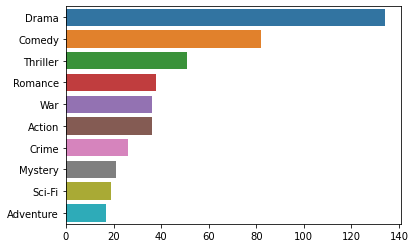

In [221]:
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

150개 이상의 별점 리뷰를 가지고 있고, 여성들의 별점 평균이 4.0 이상인 영화들에 나오는 장르들.

In [222]:
idx_female = by_gender_150[by_gender_150['F'] >= 4.0].index

In [223]:
idx_female

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Saving Private Ryan (1998)', 'Matrix, The (1999)',
       'Silence of the Lambs, The (1991)', 'Raiders of the Lost Ark (1981)',
       'Fargo (1996)', 'Sixth Sense, The (1999)', 'Braveheart (1995)',
       ...
       'Once Were Warriors (1994)', 'Suspicion (1941)', 'Everest (1998)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)', 'Dead Man (1995)', 'Twelfth Night (1996)'],
      dtype='object', length=279)

In [224]:
female_movies = movies_with_index.loc[idx_female]

In [225]:
female_movies

,movie_id,genres
American Beauty (1999),2858,Comedy|Drama
Star Wars: Episode IV - A New Hope (1977),260,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode V - The Empire Strikes Back (1980),1196,Action|Adventure|Drama|Sci-Fi|War
Saving Private Ryan (1998),2028,Action|Drama|War
"Matrix, The (1999)",2571,Action|Sci-Fi|Thriller
...,...,...
Sullivan's Travels (1942),2936,Comedy
Paradise Lost: The Child Murders at Robin Hood Hills (1996),1361,Documentary
"Pawnbroker, The (1965)",3789,Drama
Dead Man (1995),714,Western


In [226]:
female_genres = []  # 여성 별점 평균 4.0 이상인 영화의 장르들을 저장할 리스트
for s in female_movies['genres']:
    female_genres.extend(s.split(sep='|'))

In [227]:
len(female_genres)

511

In [228]:
# 여성 별점 평균 4.0 이상인 영화의 장르 개수 상위 10개
female_genre_counts = pd.value_counts(female_genres).head(n=10)

In [229]:
female_genre_counts

Drama        145
Comedy        82
Romance       47
Thriller      40
War           32
Action        24
Mystery       22
Crime         21
Musical       17
Adventure     15
dtype: int64

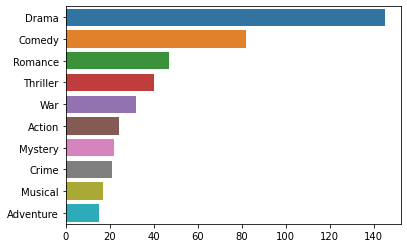

In [230]:
sns.barplot(x=female_genre_counts.values, y=female_genre_counts.index)
plt.show()

150개 이상의 별점 리뷰를 가지고 있고, 남성들의 별점 평균이 4.0 이상인 영화 장르의 상위 10개

In [231]:
# 150개 이상의 별점 리뷰를 가지고 있고, 남성들의 별점 평균이 4.0 이상인 영화의 제목들
idx_male = by_gender_150[by_gender_150['M'] >= 4.0].index

In [232]:
# 남성 별점 평균이 4.0 이상인 영화들
movies_male = movies_with_index.loc[idx_male]

In [233]:
male_genres = []
for s in movies_male['genres']:
    male_genres.extend(s.split(sep='|'))

In [234]:
# 남성들의 선호도가 높은 영화 장르 상위 10개
male_genre_counts = pd.value_counts(male_genres).head(n=10)

In [235]:
male_genre_counts

Drama        131
Comedy        80
Thriller      49
Action        39
War           36
Romance       32
Crime         26
Sci-Fi        19
Mystery       19
Adventure     17
dtype: int64

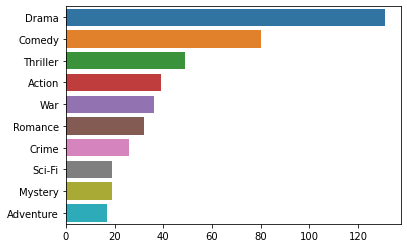

In [236]:
sns.barplot(x=male_genre_counts.values, y=male_genre_counts.index)
plt.show()

## 150건 이상의 리뷰가 있는 영화들 중에서 선호도의 차이(별점의 표주편차)가 큰 영화 상위 50개 자주 등장하는 영화 장르 5개.

In [305]:
title_counts=df['title'].value_counts().index


result=df.groupby('title')['rating'].agg(['std'])
result=result.sort_values(by='std', ascending=False).head(50)


## 연령대별(`18~24, 25~34, 35~44`)에서 평점 평균 상위 영화 제목, 장르

## "college/grad student" 직업군에서 평점 평균 상위 영화 제목, 장르